In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('C:/repos/MIRP_benchmarking/LP_files_MILP_vs_MIQP_Benchmark/results.txt', 'rb') as fp:
    results = pickle.load(fp)

In [3]:
def setup_broken_axis(value_limits, ticks=None):
    fig, axes = plt.subplots(2, 2, width_ratios=(0.2, 1), height_ratios=(1, 0.2))
    fig.subplots_adjust(hspace=0.05, wspace=0.04)  # adjust space between axes

    d = 1  # proportion of vertical to horizontal extent of the slanted line
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
                  linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    
    
    for i in range(2):
        axes[0, i].spines.bottom.set_visible(False)
        axes[1, i].spines.top.set_visible(False)
        axes[0, i].set_xticks([])

        axes[i, 0].spines.right.set_visible(False)
        axes[i, 1].spines.left.set_visible(False)
        axes[i, 1].set_yticks([])
        
        for j in range(2):
            axes[i, j].set_ylim(*value_limits[1-i])
            axes[i, j].set_xlim(*value_limits[j])
            
            axes[i, j].plot(
                [value_limits[j][0], value_limits[j][1]], 
                [value_limits[1-i][i], value_limits[1-i][i]], 
                'k:'
            )
            axes[i, j].plot(
                [value_limits[j][1-j], value_limits[j][1-j]], 
                [value_limits[1-i][0], value_limits[1-i][1]], 
                'k:'
            )
            axes[i, j].plot(value_limits[j], np.roll(value_limits[1-i], j-i), **kwargs)  

    axes[1, 0].set_yticks([np.average(value_limits[0])])
    axes[1, 0].set_xticks([np.average(value_limits[0])])
    axes[1, 0].set_yticklabels(['None'])
    axes[1, 0].set_xticklabels(['None']) 
    
    axes[0, 0].set_ylabel('Maximal feasible Profit MIQP')
    axes[1, 1].set_xlabel('Maximal feasible Profit MILP')
    
    if ticks:
        axes[0, 0].set_yticks(ticks)
        axes[1, 1].set_xticks(ticks)
    
    return fig, axes

In [4]:
def plot_data(data, ticks=None):
    points = np.array([value for value in data.values()])

    aux = lambda x, z: np.round(x + z * (100 + 0.05 * np.abs(x)), decimals=-2)
    value_limits = np.array([np.min(points[points > -1e10]), np.max(points)])
    value_limits = aux(value_limits, np.array([-1, 1]))
    value_limits = [[-1e10, -3e10], value_limits]

    points[points < -1e10] = -2e10

    fig, axes = setup_broken_axis(value_limits = value_limits, ticks=ticks)

    axes[0, 1].plot(value_limits[1], value_limits[1], 'k', linestyle='-.', lw=0.5, zorder=-1)
    for axes_ in axes:
        for ax in axes_:
            ax.scatter(points[:, 0], points[:, 1], marker='x', zorder=1)

    return fig, axes

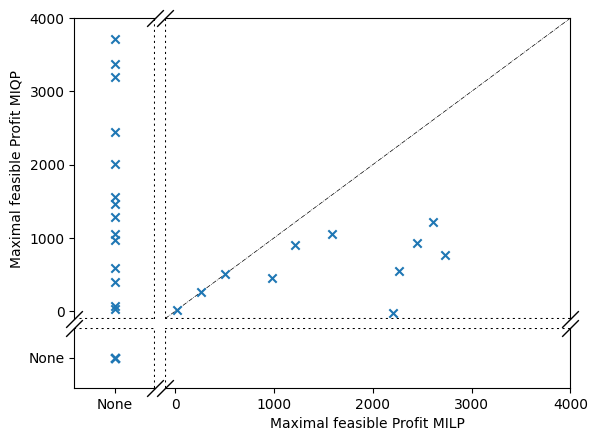

In [5]:
fig, axes = plot_data(results[5], ticks=[0, 1000, 2000, 3000, 4000])
plt.savefig('figure_MILP_vs_MIQP_5s')

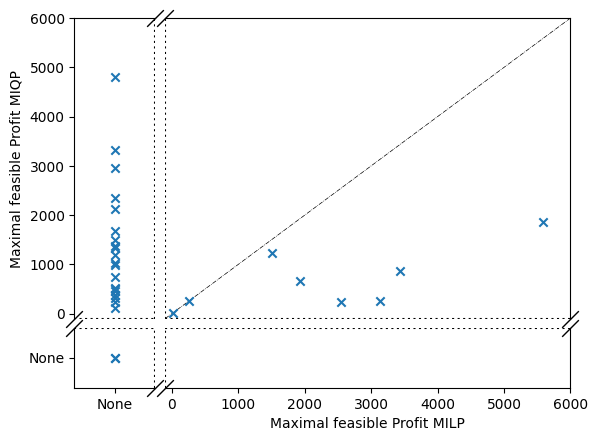

In [6]:
fig, axes = plot_data(results[10])
plt.savefig('figure_MILP_vs_MIQP_10s')

In [93]:
calculation_times = np.sort([key for key in results.keys()])
table_data = {
    key: np.array([
        results[calculation_time][key] 
        for calculation_time in calculation_times
    ]).flatten()
    for key in results[calculation_times[0]].keys()
}

table_data = np.array([[*key, *np.round(value).astype(int)] for key, value in table_data.items()])
table_data = list(table_data[np.argsort(100 * table_data[:, 5] + 10 * table_data[:, 0] + table_data[:, 1])])
aux = lambda x: x if x > -1e9 else None
table_data = [[aux(x) for x in line] for line in table_data]

table_string = '\\begin{table}[] \n'
table_string += '\\begin{tabular}{' + len(table_data[0]) * 'l' + '} \n'
table_string += '\\#pp & \\#cp & \\#sv & \\#mv & \\#lv & ph '
for calculation_time in calculation_times:
    table_string += f'& l {calculation_time}s & q {calculation_time}s '
table_string += '\\\\\n'
for line in table_data:
    for entry in line[:-1]:
        table_string += f'{entry} & '
    table_string += str(line[-1]) + ' \\\\\n'
table_string = table_string[:-6] + '\n'
table_string += '\\end{tabular} \n'
table_string += '\\end{table}'
print(table_string)

\begin{table}[] 
\begin{tabular}{llllllllll} 
\#pp & \#cp & \#sv & \#mv & \#lv & ph & l 5s & q 5s & l 10s & q 10s \\
1 & 1 & 1 & 0 & 0 & 10 & 21 & 21 & 21 & 21 \\
1 & 1 & 1 & 0 & 0 & 15 & 262 & 262 & 262 & 262 \\
1 & 1 & 1 & 0 & 0 & 20 & 504 & 504 & None & 509 \\
1 & 2 & 0 & 0 & 1 & 20 & 1588 & 1058 & None & 994 \\
1 & 2 & 1 & 1 & 0 & 20 & 977 & 457 & None & 457 \\
1 & 3 & 0 & 0 & 2 & 20 & None & 1060 & 1511 & 1237 \\
1 & 3 & 1 & 1 & 0 & 20 & None & 971 & None & 1326 \\
2 & 2 & 1 & 0 & 0 & 20 & None & 30 & None & 246 \\
2 & 2 & 0 & 1 & 1 & 20 & 2202 & -18 & 2549 & 240 \\
2 & 3 & 2 & 0 & 0 & 20 & None & 397 & None & 388 \\
2 & 3 & 1 & 1 & 0 & 20 & 1217 & 907 & None & 327 \\
2 & 3 & 0 & 0 & 2 & 20 & 2264 & 546 & 1936 & 667 \\
2 & 4 & 0 & 0 & 2 & 20 & None & 1285 & None & 1682 \\
2 & 4 & 2 & 1 & 0 & 20 & None & 1555 & None & 1183 \\
1 & 1 & 1 & 0 & 0 & 25 & None & None & None & 748 \\
1 & 2 & 1 & 1 & 0 & 25 & None & 1457 & None & 1496 \\
1 & 2 & 0 & 0 & 2 & 25 & 2445 & 937 & 3441 & 869 \\